### __Problem Statement:__ The objective of this project is __to understand and predict the persistency of a drug prescribed by physicians__. Persistency, in this context, refers to whether a patient, based on his/her information, will follow the prescribed medication regimen over a certain period.

### Identifying factors that influence persistency is crucial for pharmaceutical companies to improve patient outcomes, reduce healthcare costs, and enhance their product offerings.

# <font color = #32CD32> Part 1 - Data Understanding</font>

## 1.1. Import libraries

In [1]:
import warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('fivethirtyeight')
warnings.filterwarnings("ignore")

## 1.2. Read Dataset

In [2]:
df = pd.read_excel('Healthcare_dataset.xlsx')
df.head()

,Ptid,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,...,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks
0,P1,Persistent,Male,Caucasian,Not Hispanic,West,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0
1,P2,Non-Persistent,Male,Asian,Not Hispanic,West,55-65,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0
2,P3,Non-Persistent,Female,Other/Unknown,Hispanic,Midwest,65-75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,Y,N,N,N,N,N,N,N,2
3,P4,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,1
4,P5,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,1


## 1.3. Data Understanding

* ### 1.3.1. Number of observations and features

In [3]:
print(f'Number of Observations: {df.shape[0]}')
print(f'Number of Features: {df.shape[1]}')

Number of Observations: 3424
Number of Features: 69


* ### 1.3.2. Info

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3424 entries, 0 to 3423
Data columns (total 69 columns):
 #   Column                                                              Non-Null Count  Dtype 
---  ------                                                              --------------  ----- 
 0   Ptid                                                                3424 non-null   object
 1   Persistency_Flag                                                    3424 non-null   object
 2   Gender                                                              3424 non-null   object
 3   Race                                                                3424 non-null   object
 4   Ethnicity                                                           3424 non-null   object
 5   Region                                                              3424 non-null   object
 6   Age_Bucket                                                          3424 non-null   object
 7   Ntm_Speciality          

> #### Column 'Persistency_Flag' is a target

* ### 1.3.3. Description

In [5]:
# numerical columns
df.describe(include=['int64'])

,Dexa_Freq_During_Rx,Count_Of_Risks
count,3424.000000,3424.000000
mean,3.016063,1.239486
std,8.136545,1.094914
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,1.000000
75%,3.000000,2.000000
max,146.000000,7.000000


In [6]:
# categorical columns
df.describe(exclude=['int64'])

,Ptid,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,...,Risk_Chronic_Liver_Disease,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls
count,3424,3424,3424,3424,3424,3424,3424,3424,3424,3424,...,3424,3424,3424,3424,3424,3424,3424,3424,3424,3424
unique,3424,2,2,4,3,5,4,36,2,3,...,2,2,2,2,2,2,2,2,2,2
top,P3408,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,N
freq,1,2135,3230,3148,3235,1383,1439,1535,2013,2104,...,3406,3066,3382,1788,3232,3357,3370,3413,3410,3355


* ### 1.3.4. Check for duplicated values

In [7]:
print(f"Number of duplicates: {df.duplicated().sum()}")

Number of duplicates: 0


* ### 1.3.5. Check for unique values

In [8]:
unique_values = {}

for col in df.columns:
    unique_values[col] = df[col].unique()

In [9]:
unique_values

{'Ptid': array(['P1', 'P2', 'P3', ..., 'P3422', 'P3423', 'P3424'], dtype=object),
 'Persistency_Flag': array(['Persistent', 'Non-Persistent'], dtype=object),
 'Gender': array(['Male', 'Female'], dtype=object),
 'Race': array(['Caucasian', 'Asian', 'Other/Unknown', 'African American'],
       dtype=object),
 'Ethnicity': array(['Not Hispanic', 'Hispanic', 'Unknown'], dtype=object),
 'Region': array(['West', 'Midwest', 'South', 'Other/Unknown', 'Northeast'],
       dtype=object),
 'Age_Bucket': array(['>75', '55-65', '65-75', '<55'], dtype=object),
 'Ntm_Speciality': array(['GENERAL PRACTITIONER', 'Unknown', 'ENDOCRINOLOGY', 'RHEUMATOLOGY',
        'ONCOLOGY', 'PATHOLOGY', 'OBSTETRICS AND GYNECOLOGY',
        'PSYCHIATRY AND NEUROLOGY', 'ORTHOPEDIC SURGERY',
        'PHYSICAL MEDICINE AND REHABILITATION',
        'SURGERY AND SURGICAL SPECIALTIES', 'PEDIATRICS',
        'PULMONARY MEDICINE', 'HEMATOLOGY & ONCOLOGY', 'UROLOGY',
        'PAIN MEDICINE', 'NEUROLOGY', 'RADIOLOGY', 'GASTROENT

* ### 1.3.6. Check for NaN values

In [10]:
print(f"Number of NaNs: {df.isna().sum().sum()}")

Number of NaNs: 0


> #### There are no NaN values. But as we can see above, there are 8 columns with __'Unknown' or 'Other/Unknown' categories__. Let's take a closer look at each such column and see how we can replace them.

#### 1. Race

In [13]:
# describe
df['Race'].describe()

count          3424
unique            4
top       Caucasian
freq           3148
Name: Race, dtype: object

In [14]:
# value counts
df['Race'].value_counts()

Race
Caucasian           3148
Other/Unknown         97
African American      95
Asian                 84
Name: count, dtype: int64

#### 2. Ethnicity

In [15]:
# describe
df['Ethnicity'].describe()

count             3424
unique               3
top       Not Hispanic
freq              3235
Name: Ethnicity, dtype: object

In [16]:
# value counts
df['Ethnicity'].value_counts()

Ethnicity
Not Hispanic    3235
Hispanic          98
Unknown           91
Name: count, dtype: int64

#### 3. Region

In [17]:
# describe
df['Region'].describe()

count        3424
unique          5
top       Midwest
freq         1383
Name: Region, dtype: object

In [18]:
# value counts
df['Region'].value_counts()

Region
Midwest          1383
South            1247
West              502
Northeast         232
Other/Unknown      60
Name: count, dtype: int64

#### 4. Ntm_Speciality

In [19]:
# describe
df['Ntm_Speciality'].describe()

count                     3424
unique                      36
top       GENERAL PRACTITIONER
freq                      1535
Name: Ntm_Speciality, dtype: object

In [20]:
# value counts
df['Ntm_Speciality'].value_counts()

Ntm_Speciality
GENERAL PRACTITIONER                                              1535
RHEUMATOLOGY                                                       604
ENDOCRINOLOGY                                                      458
Unknown                                                            310
ONCOLOGY                                                           225
OBSTETRICS AND GYNECOLOGY                                           90
UROLOGY                                                             33
ORTHOPEDIC SURGERY                                                  30
CARDIOLOGY                                                          22
PATHOLOGY                                                           16
OTOLARYNGOLOGY                                                      14
HEMATOLOGY & ONCOLOGY                                               14
PEDIATRICS                                                          13
PHYSICAL MEDICINE AND REHABILITATION                          

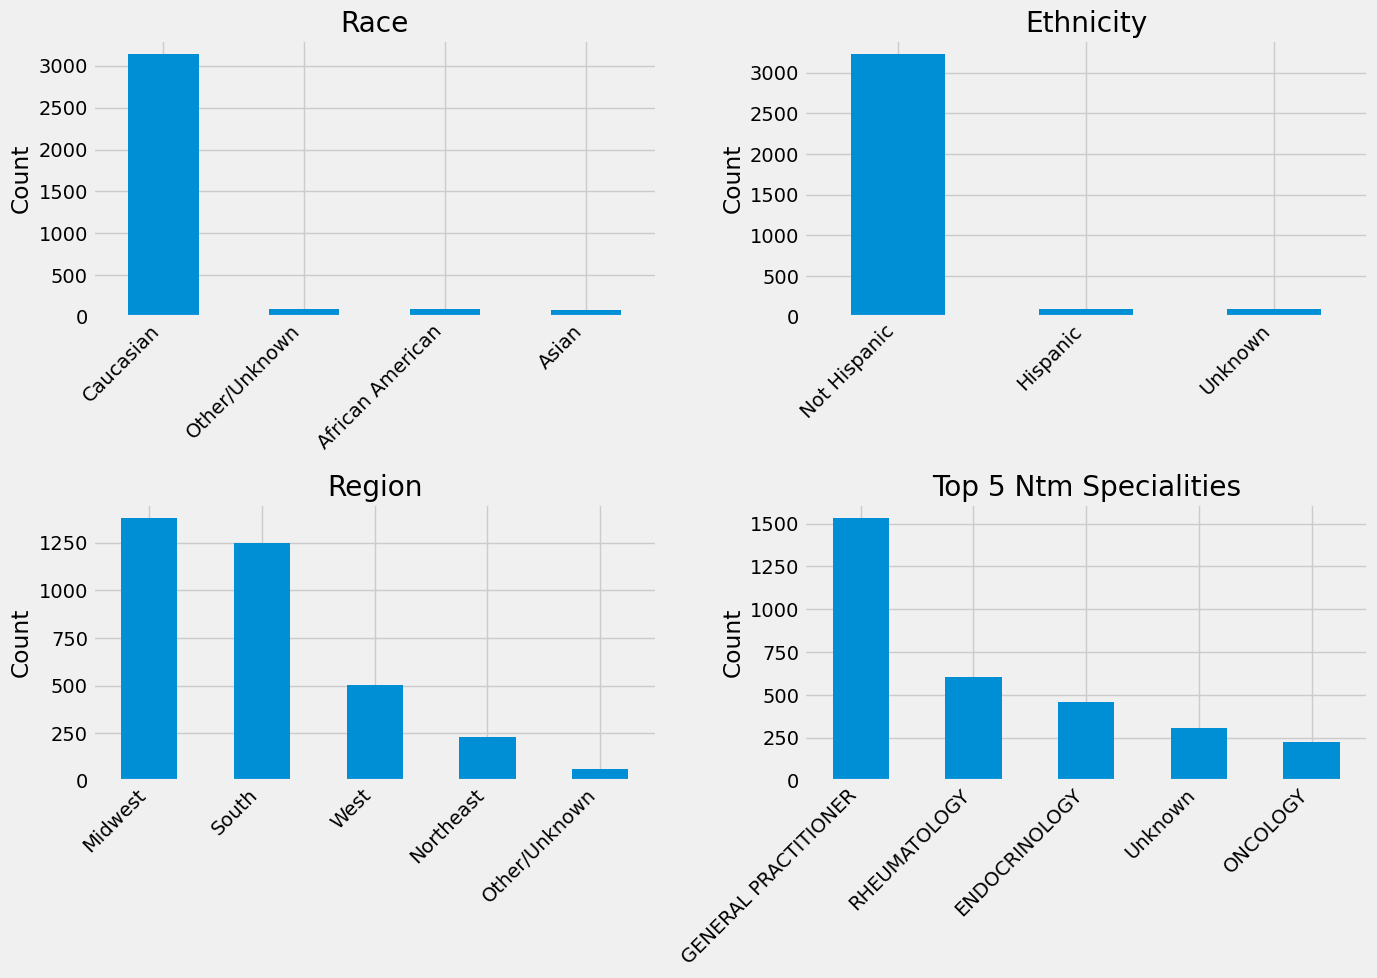

In [21]:
# top 5 categories of 'Ntm_Speciality'
top_5_specialities = df['Ntm_Speciality'].value_counts().head(5)

# other columns
columns_to_plot = ['Race', 'Ethnicity', 'Region']

_, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))

# Plot 'Race', 'Ethnicity', and 'Region'
for ax, column in zip(axes.flatten()[:3], columns_to_plot):
    df[column].value_counts().plot(kind='bar', ax=ax, title=column)
    ax.set_xlabel('')
    ax.set_ylabel('Count')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Plot top 5 'Ntm_Speciality'
top_5_specialities.plot(kind='bar', ax=axes.flatten()[3], title='Top 5 Ntm Specialities')
axes.flatten()[3].set_xlabel('')
axes.flatten()[3].set_ylabel('Count')
axes.flatten()[3].set_xticklabels(axes.flatten()[3].get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()

> #### For __'Race'__ and __'Ethnicity'__ columns, we will replace the Unknown category with the corresponding __mode value__, since unknown values make up a small percentage of the data and this will be quite safe.
> #### For __'Region'__ column we will use Region mode for 'Not Hispanic', because only 1.75% missing values and 100% of them are of Ethnicity 'Not Hispanic'.
> #### For __'Ntm_Speciality'__ we will try 2 approaches:
> ##### 1. keeping unknowns as a category since it accounts for less than 9.05% of data and see how it relates to other variables.
> ##### 2. using of mode as substitution

#### 5. Risk_Segment_During_Rx

In [22]:
# describe
df['Risk_Segment_During_Rx'].describe()

count        3424
unique          3
top       Unknown
freq         1497
Name: Risk_Segment_During_Rx, dtype: object

In [23]:
# value counts
df['Risk_Segment_During_Rx'].value_counts()

Risk_Segment_During_Rx
Unknown    1497
HR_VHR      965
VLR_LR      962
Name: count, dtype: int64

#### 6. Tscore_Bucket_During_Rx

In [24]:
# describe
df['Tscore_Bucket_During_Rx'].describe()

count        3424
unique          3
top       Unknown
freq         1497
Name: Tscore_Bucket_During_Rx, dtype: object

In [25]:
# value counts
df['Tscore_Bucket_During_Rx'].value_counts()

Tscore_Bucket_During_Rx
Unknown    1497
<=-2.5     1017
>-2.5       910
Name: count, dtype: int64

#### 7. Change_T_Score

In [26]:
# describe
df['Change_T_Score'].describe()

count          3424
unique            4
top       No change
freq           1660
Name: Change_T_Score, dtype: object

In [27]:
# value counts
df['Change_T_Score'].value_counts()

Change_T_Score
No change    1660
Unknown      1497
Worsened      173
Improved       94
Name: count, dtype: int64

#### 8. Change_Risk_Segment

In [28]:
# describe
df['Change_Risk_Segment'].describe()

count        3424
unique          4
top       Unknown
freq         2229
Name: Change_Risk_Segment, dtype: object

In [29]:
# value counts
df['Change_Risk_Segment'].value_counts()

Change_Risk_Segment
Unknown      2229
No change    1052
Worsened      121
Improved       22
Name: count, dtype: int64

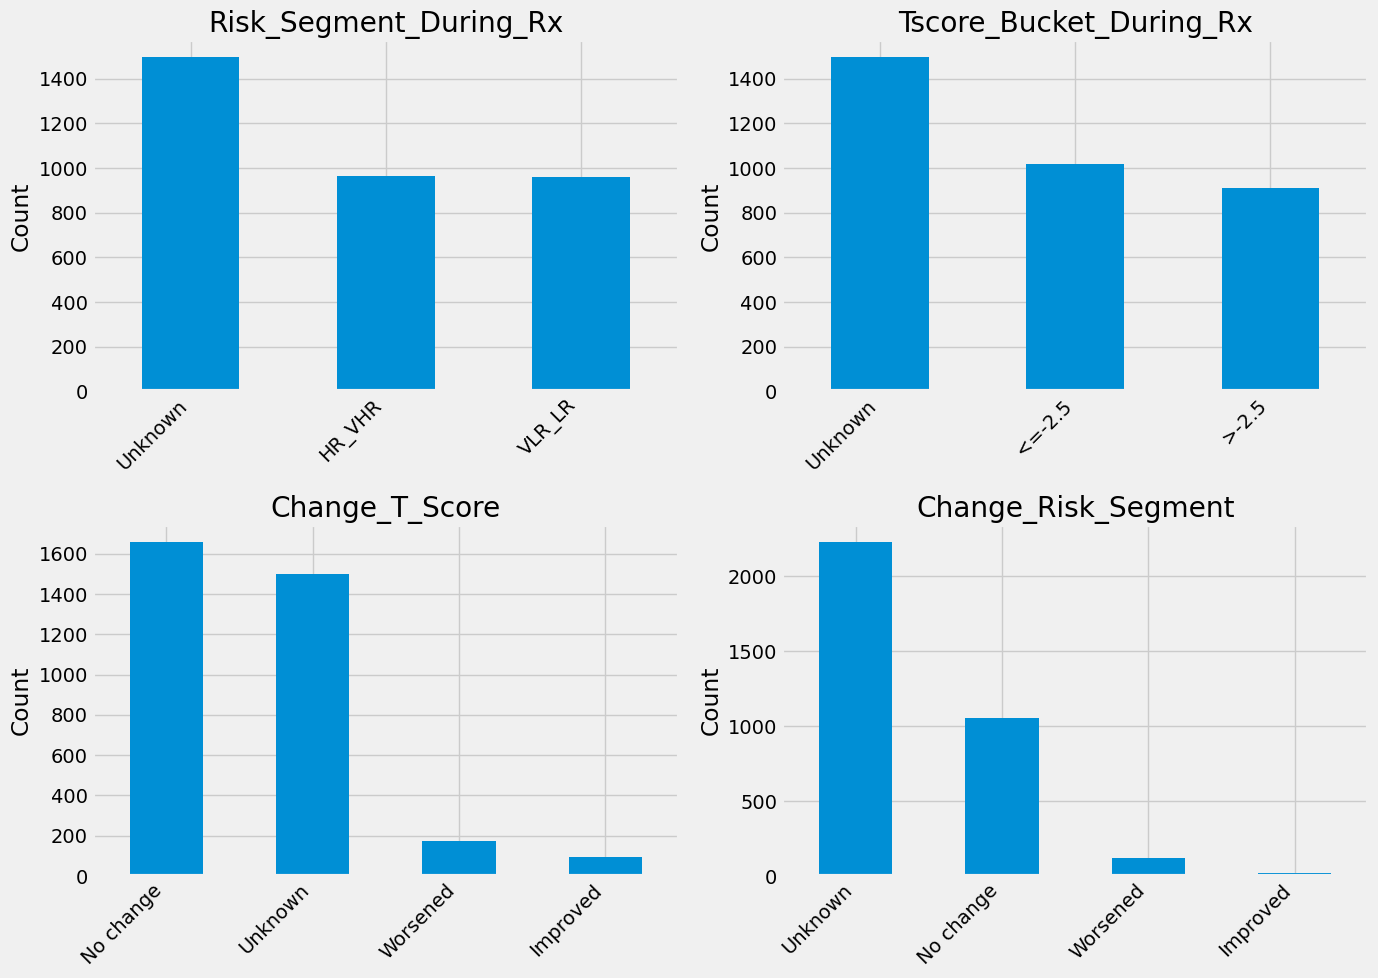

In [30]:
# top 10 'Ntm_Speciality' along with other columns
columns_to_plot = ['Risk_Segment_During_Rx', 'Tscore_Bucket_During_Rx', 'Change_T_Score', 'Change_Risk_Segment']

# Prepare the figure for plotting
_, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))

# Plot 'Race', 'Ethnicity', and 'Region'
for ax, column in zip(axes.flatten(), columns_to_plot):
    df[column].value_counts().plot(kind='bar', ax=ax, title=column)
    ax.set_xlabel('')
    ax.set_ylabel('Count')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


plt.tight_layout()
plt.show()

> #### All these features have more than 40% missing values, consequently they will be __eliminated__.